# 1. Cities in Sweden - create dataset

- Create this DataFrame from scratch:

In [1]:
import pandas as pd

data = pd.Series(
    {"Malmö": 347949, "Stockholm": 975551, "Uppsala": 233839, "Göteborg": 583056}
)

df = pd.DataFrame({"Kommun": data.keys(), "Population": data.values})

df


,Kommun,Population
0,Malmö,347949
1,Stockholm,975551
2,Uppsala,233839
3,Göteborg,583056


###  a) Use your DataFrame to print out all the cities. 

In [2]:
df["Kommun"]


0        Malmö
1    Stockholm
2      Uppsala
3     Göteborg
Name: Kommun, dtype: object

### b) Select only the row which contains Göteborg. Do this by using the name Göteborg.

In [3]:
df.loc[df["Kommun"] == "Göteborg"]


,Kommun,Population
3,Göteborg,583056


### c) Sort the cities by population from largest to smallest. 

In [4]:
sorted_citys = df.sort_values(by="Population", ascending=False)
sorted_citys


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949
2,Uppsala,233839


### d) Filter out the three largest cities.

In [5]:
sorted_citys.head(3)


,Kommun,Population
1,Stockholm,975551
3,Göteborg,583056
0,Malmö,347949


### e) The whole population in Sweden 2020 is 10379295. Use this number to create a new column in your sorted DataFrame named: Population (%). This column should be filled with percentage of the Swedish population for each city.

In [6]:
sorted_citys["Population (%)"] = round((sorted_citys["Population"] / 10379295) * 100, 1)
sorted_citys


,Kommun,Population,Population (%)
1,Stockholm,975551,9.4
3,Göteborg,583056,5.6
0,Malmö,347949,3.4
2,Uppsala,233839,2.3


# 2. Cities in Sweden - real dataset

### a) Read in the tab "Totalt" into a DataFrame and start exploring the data with some simple explorations such as

- df.head()
- df.info()
- df.describe()

In [7]:
df = pd.read_excel(
    "../Data/komtopp50_2020.xlsx", header=5, usecols=range(0, 6), sheet_name="Totalt"
)

df.head()


,Rang,Unnamed: 1,Kommun,Folkmängd 31 december,Unnamed: 4,Förändring
0,2020,2019,NaN,2020,2019,%
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291 entries, 0 to 290
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rang                   291 non-null    int64 
 1   Unnamed: 1             291 non-null    int64 
 2   Kommun                 290 non-null    object
 3   Folkmängd 31 december  291 non-null    int64 
 4   Unnamed: 4             291 non-null    int64 
 5   Förändring             291 non-null    object
dtypes: int64(4), object(2)
memory usage: 13.8+ KB


In [9]:
df.describe()


,Rang,Unnamed: 1,Folkmängd 31 december,Unnamed: 4
count,291.000000,291.000000,291.000000,291.000000
mean,151.941581,151.934708,35674.621993,35496.934708
std,138.141207,138.092769,74524.551914,74190.464321
min,1.000000,1.000000,2020.000000,2019.000000
25%,73.500000,73.500000,9993.500000,10005.000000
50%,146.000000,146.000000,16063.000000,15940.000000
75%,218.500000,218.500000,35775.500000,35649.500000
max,2020.000000,2019.000000,975551.000000,974073.000000


### b) Clean your data so that the h

In [10]:
data_frame = df.drop(0, inplace=False)

data_frame = data_frame.rename(
    columns={
        "Rang": "Rang 2020",
        "Unnamed: 1": "Rang 2019",
        "Folkmängd 31 december": "Folkmängd 2020",
        "Unnamed: 4": "Folkmängd 2019",
    }
)

data_frame


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
1,83,84,Ale,31868,31402,1.483982
2,64,64,Alingsås,41602,41420,0.439401
3,123,123,Alvesta,20224,20134,0.447005
4,255,255,Aneby,6821,6848,-0.394276
5,169,167,Arboga,14039,14087,-0.34074
...,...,...,...,...,...,...
286,54,55,Österåker,46644,45574,2.34783
287,116,115,Östhammar,22251,22250,0.004494
288,160,159,Östra Göinge,15017,15007,0.066636
289,284,284,Överkalix,3289,3315,-0.784314


### c) Sort the cities by population from largest to smallest.

In [11]:
sorted_citys = data_frame.sort_values(by="Folkmängd 2020", ascending=False)
sorted_citys.reset_index(drop=True, inplace=True)

sorted_citys


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
0,1,1,Stockholm,975551,974073,0.151734
1,2,2,Göteborg,583056,579281,0.65167
2,3,3,Malmö,347949,344166,1.099179
3,4,4,Uppsala,233839,230767,1.331213
4,5,5,Linköping,164616,163051,0.959822
...,...,...,...,...,...,...
285,286,286,Åsele,2805,2794,0.393701
286,287,287,Arjeplog,2718,2785,-2.405745
287,288,288,Dorotea,2498,2551,-2.077617
288,289,289,Sorsele,2442,2489,-1.888309


### d) Filter out the five smallest cities.

In [12]:
bottom5_citys = sorted_citys[:-6:-1]
bottom5_citys


,Rang 2020,Rang 2019,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring
289,290,290,Bjurholm,2387,2408,-0.872093
288,289,289,Sorsele,2442,2489,-1.888309
287,288,288,Dorotea,2498,2551,-2.077617
286,287,287,Arjeplog,2718,2785,-2.405745
285,286,286,Åsele,2805,2794,0.393701


### e) Use the DataFrame to calculate Sweden's population in 2019 and 2020.

In [13]:
swe_population_2019 = data_frame["Folkmängd 2019"].sum()
swe_population_2020 = data_frame["Folkmängd 2020"].sum()

print(swe_population_2019)
print(swe_population_2020)


10327589
10379295


### f) Plot a bar chart for the five largest cities and the five smallest cities.

<AxesSubplot: xlabel='Kommun', ylabel='Folkmängd 2020'>

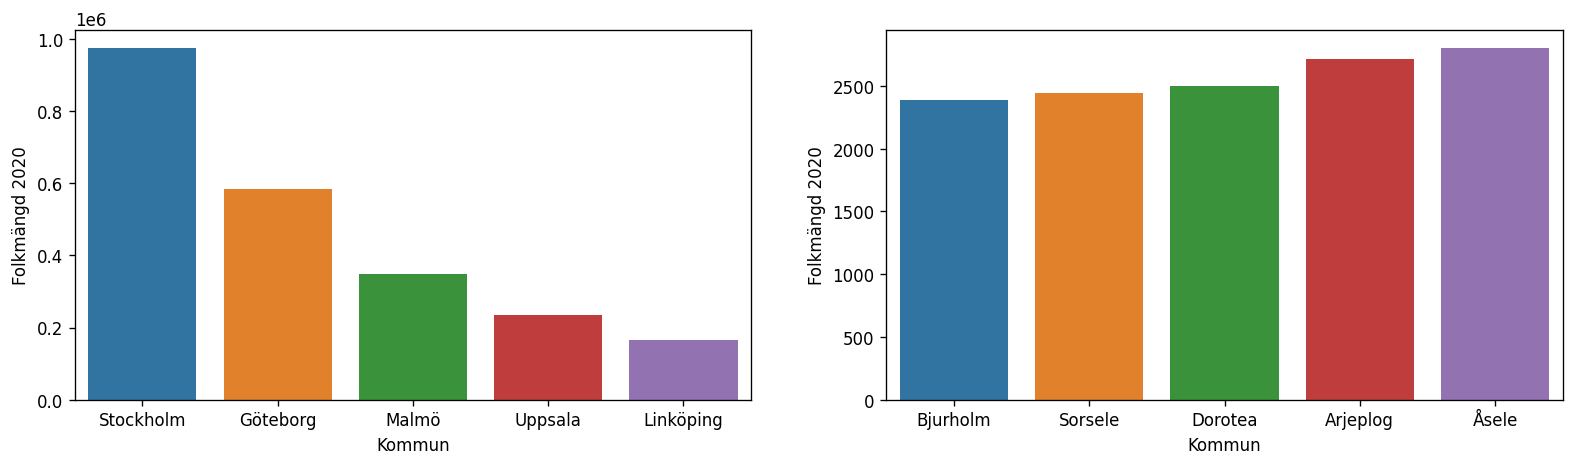

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 4), dpi=120)

five_max_citys = sorted_citys.head()
five_min_citys = sorted_citys[:-6:-1]

sns.barplot(
    data=five_max_citys,
    x=five_max_citys["Kommun"],
    y=five_max_citys["Folkmängd 2020"],
    ax=axes[0],
)
sns.barplot(
    data=five_min_citys,
    x=five_min_citys["Kommun"],
    y=five_min_citys["Folkmängd 2020"],
    ax=axes[1],
)


# 3. Cities in Sweden - gender

We continue with the same Excel-file as in task 2, but now you should also read in the sheets "Kvinnor" and "Män" into two additional DataFrames. In this task, many operations are similar to all three datasets, try creating custom made functions to reuse as much code as possible.

In [15]:
df_total = data_frame

file_path = "../Data/komtopp50_2020.xlsx"
sheet_names = ["Män", "Kvinnor"]

df_dict = pd.read_excel(file_path, sheet_name=sheet_names, header=6)


### a) Clean your data so that the head looks like this:

In [16]:


columns_names = [
    "Rang 2020",
    "Rang 2019",
    "Kommun",
    "Folkmängd 2020",
    "Folkmängd 2019",
    "Förändring"
]

for key, value in df_dict.items():

    for i, n in enumerate(value.columns):

        value.rename(columns={n: columns_names[i]}, inplace=True)

    value["Kön"] = key




### b) Merge the male and female DataFrames vertically and set index to "Kommun". Note that there now should be 580 rows now. 

|    | Kommun   |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|---:|:---------|-----------------:|-----------------:|-------------------:|
|  0 | Ale      |            31868 |            31402 |           1.48398  |
|  1 | Alingsås |            41602 |            41420 |           0.439401 |
|  2 | Alvesta  |            20224 |            20134 |           0.447005 |
|  3 | Aneby    |             6821 |             6848 |          -0.394276 |
|  4 | Arboga   |            14039 |            14087 |          -0.34074  |


In [17]:
df = pd.concat([df_dict["Män"], df_dict["Kvinnor"]], axis=0)
df.drop(["Rang 2020", "Rang 2019"], axis= "columns", inplace= True)


### c) Extract and change column name from the total DataFrame so that the head look like this:


In [18]:
df_total = df_total.rename(
    columns={
        "Folkmängd 2020": "Total pop 2020",
        "Folkmängd 2019": "Total pop 2019",
        "Förändring": "Total förändring"
    }
    
).drop(["Rang 2020", "Rang 2019"], axis="columns")




### d) Merge this data with the data in b) so that the head look like this:

| Kommun    |   Folkmängd 2020 |   Folkmängd 2019 |   Förändring | Kön    |   Total Pop 2020 |   Total Pop 2019 |   Total förändring |
|:----------|-----------------:|-----------------:|-------------:|:-------|-----------------:|-----------------:|-------------------:|
| Stockholm |           482982 |           482220 |     0.158019 | Man    |           975551 |           974073 |           0.151734 |
| Stockholm |           492569 |           491853 |     0.145572 | Kvinna |           975551 |           974073 |           0.151734 |
| Göteborg  |           292505 |           290308 |     0.756782 | Man    |           583056 |           579281 |           0.65167  |
| Göteborg  |           290551 |           288973 |     0.546072 | Kvinna |           583056 |           579281 |           0.65167  |
| Malmö     |           175411 |           173543 |     1.07639  | Kvinna |           347949 |           344166 |           1.09918  |

In [19]:
df = df.merge(df_total).sort_values(by= "Total pop 2020", ascending= False).reset_index(drop= True)


In [20]:
df

,Kommun,Folkmängd 2020,Folkmängd 2019,Förändring,Kön,Total pop 2020,Total pop 2019,Total förändring
0,Stockholm,482982,482220,0.158019,Män,975551,974073,0.151734
1,Stockholm,492569,491853,0.145572,Kvinnor,975551,974073,0.151734
2,Göteborg,290551,288973,0.546072,Kvinnor,583056,579281,0.65167
3,Göteborg,292505,290308,0.756782,Män,583056,579281,0.65167
4,Malmö,175411,173543,1.07639,Kvinnor,347949,344166,1.099179
...,...,...,...,...,...,...,...,...
575,Dorotea,1171,1195,-2.008368,Kvinnor,2498,2551,-2.077617
576,Sorsele,1285,1319,-2.57771,Män,2442,2489,-1.888309
577,Sorsele,1157,1170,-1.111111,Kvinnor,2442,2489,-1.888309
578,Bjurholm,1154,1159,-0.431406,Kvinnor,2387,2408,-0.872093


### e) Create barplots showing the gender populations of Swedens 10 largest and 10 smallest cities.

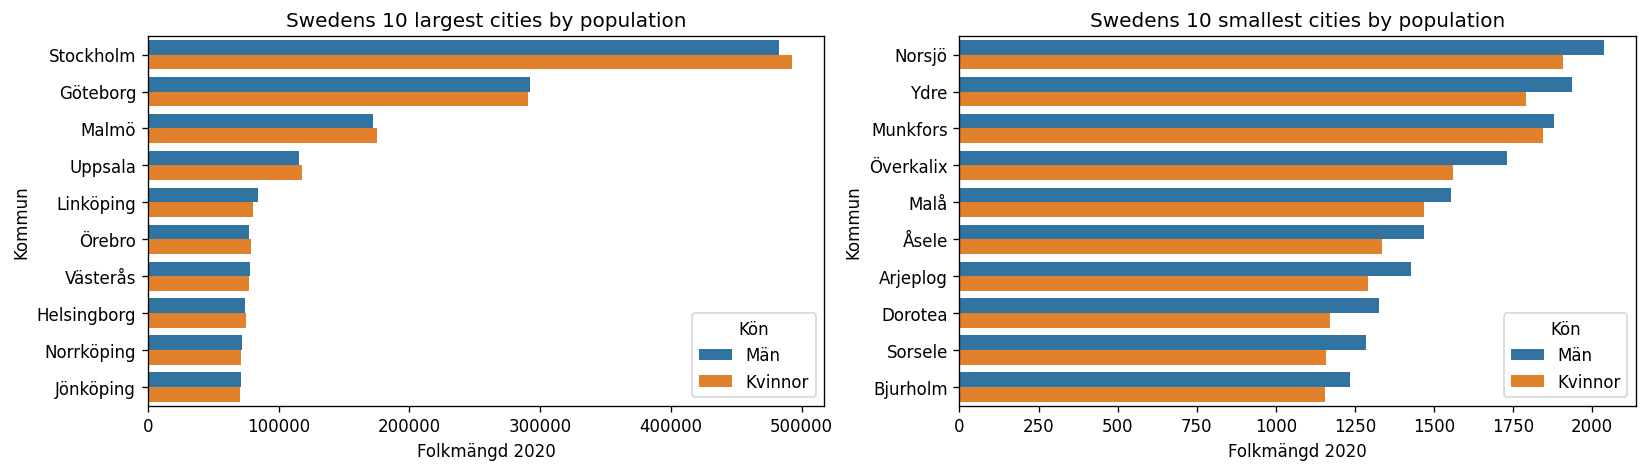

In [24]:
data = [df.head(20), df.tail(20)]

fig, ax = plt.subplots(1,2, figsize= (16, 4), dpi= 120)

titles = ["Swedens 10 largest cities by population", "Swedens 10 smallest cities by population"]

for i in range(len(data)):
    sns.barplot(data= data[i], x="Folkmängd 2020", y= "Kommun", hue= "Kön", ax= ax[i])
    ax[i].set(title= titles[i])


### f) Create a pie chart showing the total male and female population in Sweden 2020.

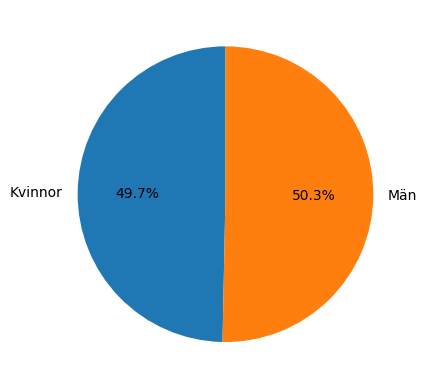

In [32]:
x = df.groupby("Kön").sum("Folkmängd 2020")

plt.pie(x= x["Folkmängd 2020"], labels=x.index, autopct="%0.1f%%", startangle=90);



### g) Create a barplot showing the cities with the five largest percentual gender difference in 2020.

In [45]:
df[df["Förändring"] == "."] = 0.0
df["Förändring"] = df["Förändring"].astype(float)

g = df.groupby("Kommun")[["Kön", "Folkmängd 2020"]].sum()

g



/var/folders/w6/9wz8n7td61q6jtrxd3n0f9l00000gn/T/ipykernel_5875/1666039534.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  g = df.groupby("Kommun")[["Kön", "Folkmängd 2020"]].sum()


,Folkmängd 2020
Kommun,
0.0,0
Ale,31868
Alingsås,41602
Alvesta,20224
Aneby,6821
...,...
Österåker,46644
Östhammar,22251
Östra Göinge,15017
